<a href="https://colab.research.google.com/github/DivyankR16/Deep_Learning/blob/main/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

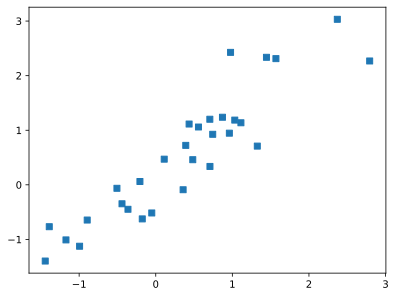

In [22]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
N=30
x=torch.randn(N,1)
y=x+torch.randn(N,1)/2
plt.plot(x,y,'s')
plt.show()

In [23]:
ANN_model=nn.Sequential(
    nn.Linear(1,2),
    nn.ReLU(),
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.ReLU(),
    nn.Linear(3,2),
    nn.ReLU(),
    nn.Linear(2,1),
)
ANN_model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=2, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2, out_features=1, bias=True)
)

In [24]:
ANN_model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1861],
                      [-0.7869]])),
             ('0.bias', tensor([-0.8965, -0.0698])),
             ('2.weight',
              tensor([[-0.2658,  0.2094],
                      [-0.1612,  0.2888],
                      [-0.6219,  0.1854],
                      [ 0.5665,  0.5059]])),
             ('2.bias', tensor([-0.5012,  0.6957, -0.2394,  0.3581])),
             ('4.weight',
              tensor([[ 0.4582,  0.0415, -0.3286,  0.2827],
                      [ 0.4234, -0.1666,  0.1302, -0.2476],
                      [ 0.1003, -0.3317, -0.0841, -0.1119]])),
             ('4.bias', tensor([ 0.4629, -0.2048, -0.1626])),
             ('6.weight',
              tensor([[ 0.1430, -0.5296,  0.5412],
                      [ 0.0957,  0.4087,  0.1525]])),
             ('6.bias', tensor([ 0.0040, -0.4360])),
             ('8.weight', tensor([[-0.1496,  0.5264]])),
             ('8.bias', tensor([-0.5081]))])

In [33]:
learning_rate=0.1
loss_func_instance=nn.MSELoss()
optimizer=torch.optim.SGD(ANN_model.parameters(),lr=learning_rate)

In [34]:
itsz=500
losses=torch.zeros(itsz)
for epoch in range(itsz):
  # forward prop
  pred=ANN_model(x)
  # Loss calculation
  loss=loss_func_instance(pred,y)
  losses[epoch]=loss
  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



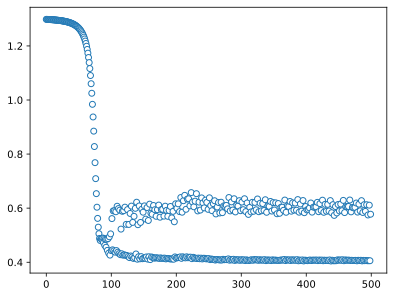

In [35]:
final_pred=ANN_model(x)
final_losses=(final_pred-y).pow(2).mean()
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.00001)
# print(final_losses.detach())

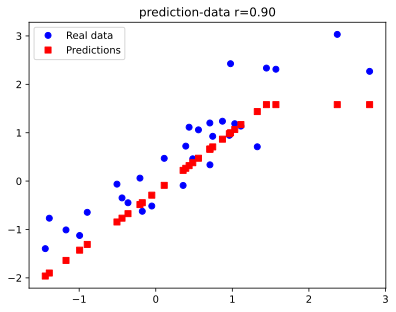

In [36]:
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,final_pred.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,final_pred.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()